# Logistic Regression Example

In [1]:
import tensorflow as tf

# Import MNIST data，手写数字
# MNIST
from tensorflow.examples.tutorials.mnist import input_data
#手写数字
mnist = input_data.read_data_sets("./", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
image = mnist.train.images
import matplotlib.pyplot as plt
%matplotlib inline

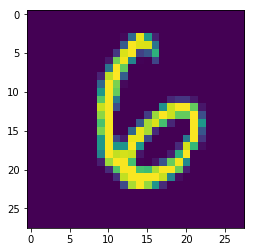

In [3]:
plt.imshow(image[1024].reshape((28,28)))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

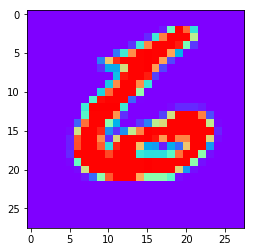

In [6]:
test = mnist.test
test_images = test.images
test_images.shape
plt.imshow(test_images[9999].reshape((28,28)),cmap = 'rainbow')
test.labels[9999]

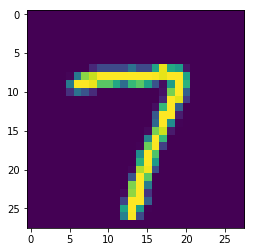

In [7]:
train = mnist.train
images = train.images
digits = images[100]
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.reshape((28,28)))

In [9]:
s = tf.nn.softmax([3,1,-3.0])

with tf.Session() as sess:
    print(sess.run(s))

[ 0.87887824  0.11894324  0.00217852]


In [ ]:
0.25红，0.25蓝，0.25白，0.25紫

随意一个球，第一次猜红 ---->第二次白--->第三次无论对错，答案

1/4 --->1/2

In [11]:
import numpy as np
np.e

2.718281828459045

In [13]:
lo = tf.log(np.e)
with tf.Session() as sess:
    print(sess.run(lo))

1.0


In [14]:
images.shape

(55000, 784)

In [23]:
a = tf.placeholder(tf.int32,shape = [None,2])
b = tf.placeholder(tf.int32,shape = [None,2])
add = tf.add(a,b)

with tf.Session() as sess:
    print(sess.run(add,feed_dict={a:np.random.randint(0,10,size = (100,3)),
                                  b:np.random.randint(0,10,size = (100,3))}))

ValueError: Cannot feed value of shape (100, 3) for Tensor 'Placeholder_16:0', which has shape '(?, 2)'

In [25]:
mnist.train.labels[:5]
# labels第一行代表7，二：3，三：4，,四：6，五：1

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

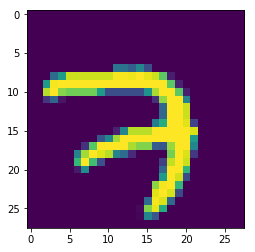

In [30]:
plt.imshow(images[0].reshape((28,28)))

In [36]:
a = tf.placeholder(tf.float32,shape = [1,784])
w = tf.placeholder(tf.float32,shape = [784,10])

matmul = tf.matmul(a,w)
with tf.Session() as sess:
    print(sess.run(matmul,feed_dict={a:np.random.randn(1,784),w:np.random.rand(784,10)}))

[[ 3.07869101 -2.23599625  2.88581562  4.87585926  7.6541357   3.51810098
   0.17419946 -2.22786379  0.61739349 -3.9204824 ]]


In [37]:
# Parameters
learning_rate = 0.01
training_epochs = 25
#batch 一批，每次训练给算法100个数据
batch_size = 100
#每隔5次，打印输出运算的结果
display_step = 5

#矩阵
# tf Graph Input
X = tf.placeholder(tf.float32, shape = [None,784]) # mnist data image of shape 28*28=784
#y ---> label 
Y = tf.placeholder(tf.float32, shape = [None,10]) # 0-9 digits recognition => 10 classes

#瞎蒙了一个数据
# Set model weights 变量
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

#创造了数据之间模型，线性，矩阵乘法
# Construct model
#y_pred 预测的结果==q
# matmul 矩阵乘法，mat：matrix
y_pred = tf.matmul(X, W) + b
# -----> X 10行，784列 W：784行，10列
# -----> 矩阵乘法，行*列

#求解了所有预测结果的概率化的结果
# Softmax把所有备胎全部拉出来评分，最后还归一化一下
pred = tf.nn.softmax(y_pred) # Softmax

#损失函数
# Minimize error using cross entropy 交叉熵
#y == p
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred), axis=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [41]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(50):
        avg_cost = 0.
        #总的训练的批次，batch_size = 100
        #total_batch = 550
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        #550
        for i in range(total_batch):
            #每一次取出来100个数据作为训练数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs,
                                                          Y: batch_ys})
            # Compute average loss
            #平均交叉熵
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print(batch_xs.shape,batch_ys.shape)
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    # Calculate accuracy for 3000 examples
#     tf.cast类型转换
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({X: mnist.test.images[:3000], Y: mnist.test.labels[:3000]}))

(100, 784) (100, 10)
Epoch: 0005 cost= 0.465222115
(100, 784) (100, 10)
Epoch: 0010 cost= 0.392302847
(100, 784) (100, 10)
Epoch: 0015 cost= 0.362758936
(100, 784) (100, 10)
Epoch: 0020 cost= 0.345396163
(100, 784) (100, 10)
Epoch: 0025 cost= 0.333915265
(100, 784) (100, 10)
Epoch: 0030 cost= 0.324720122
(100, 784) (100, 10)
Epoch: 0035 cost= 0.318102193
(100, 784) (100, 10)
Epoch: 0040 cost= 0.313063553
(100, 784) (100, 10)
Epoch: 0045 cost= 0.308571102
(100, 784) (100, 10)
Epoch: 0050 cost= 0.304317127
Optimization Finished!
Accuracy: 0.896333


In [23]:
a = tf.constant(10)
b = tf.cast(a,'float')
b

<tf.Tensor 'Cast:0' shape=() dtype=float32>

In [21]:
mnist.test.labels[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])